In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import librosa
import librosa.display

In [8]:
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [19]:
paths = []
labels = []
for dirname, _, filenames in os.walk('D:\\files\Datasets\Tess\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [20]:
len(paths)



2800

In [21]:
paths[:5]

['D:\\files\\Datasets\\Tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\files\\Datasets\\Tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\files\\Datasets\\Tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\files\\Datasets\\Tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\files\\Datasets\\Tess\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [22]:

labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [23]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry
1,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry
2,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry
3,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry
4,D:\files\Datasets\Tess\TESS Toronto emotional ...,angry


In [24]:
print(df)

                                                 speech  label
0     D:\files\Datasets\Tess\TESS Toronto emotional ...  angry
1     D:\files\Datasets\Tess\TESS Toronto emotional ...  angry
2     D:\files\Datasets\Tess\TESS Toronto emotional ...  angry
3     D:\files\Datasets\Tess\TESS Toronto emotional ...  angry
4     D:\files\Datasets\Tess\TESS Toronto emotional ...  angry
...                                                 ...    ...
2795  D:\files\Datasets\Tess\TESS Toronto emotional ...    sad
2796  D:\files\Datasets\Tess\TESS Toronto emotional ...    sad
2797  D:\files\Datasets\Tess\TESS Toronto emotional ...    sad
2798  D:\files\Datasets\Tess\TESS Toronto emotional ...    sad
2799  D:\files\Datasets\Tess\TESS Toronto emotional ...    sad

[2800 rows x 2 columns]


In [10]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

In [11]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

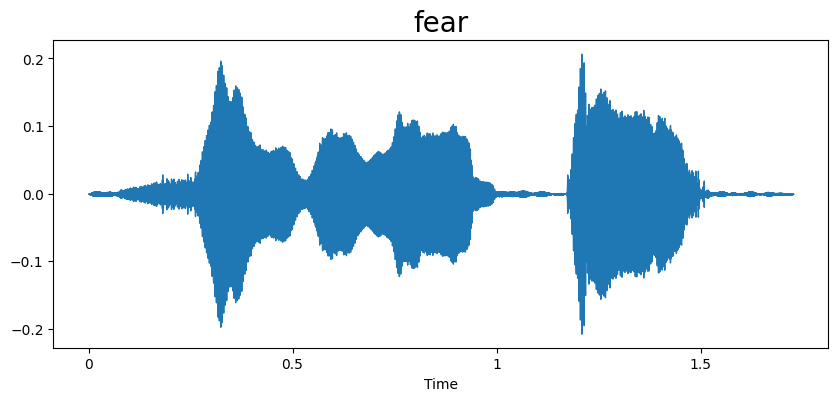

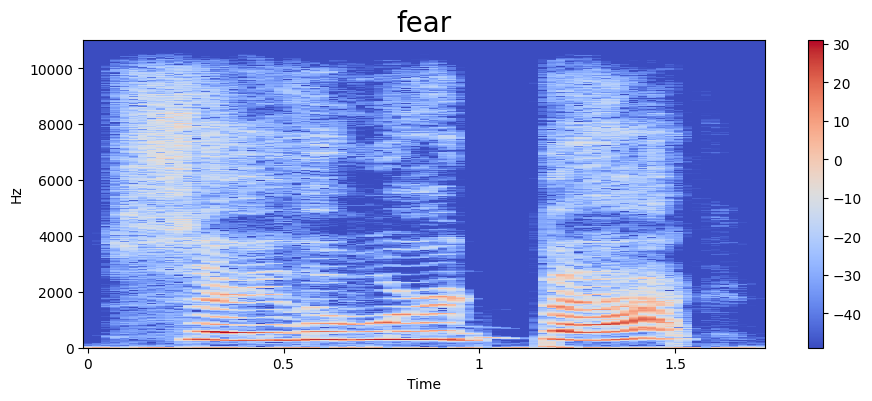

In [12]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

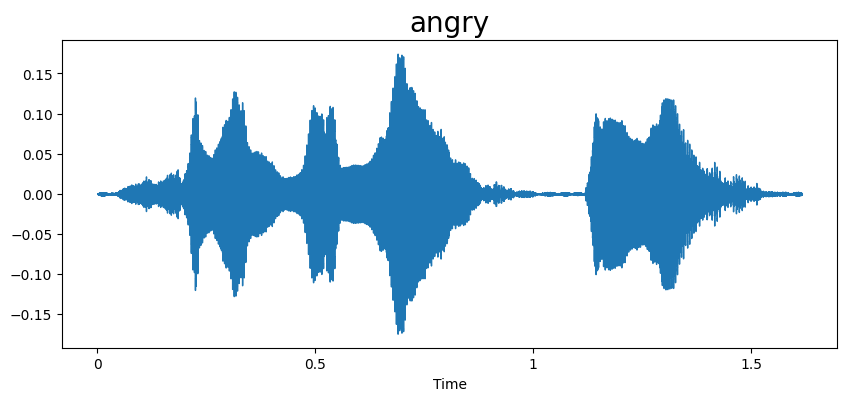

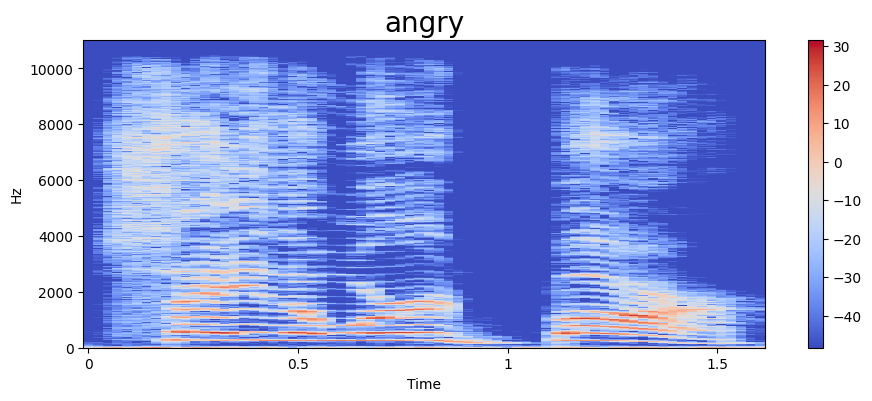

In [13]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

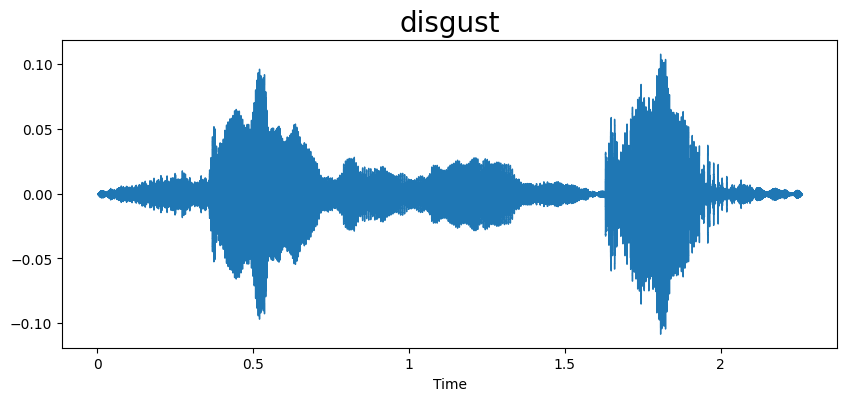

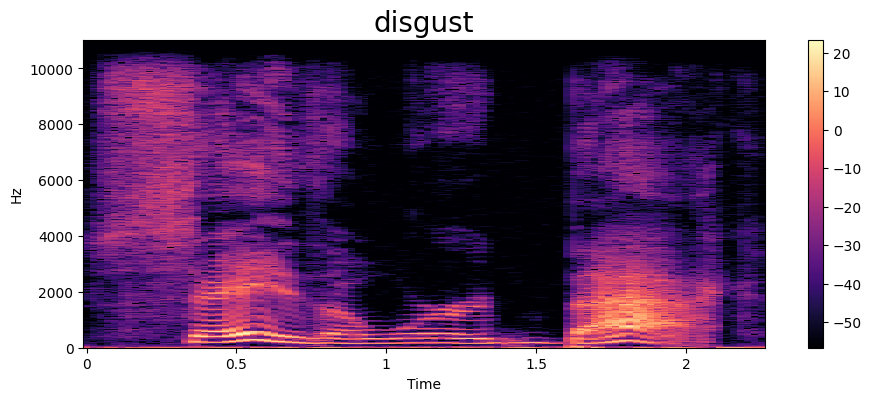

In [14]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

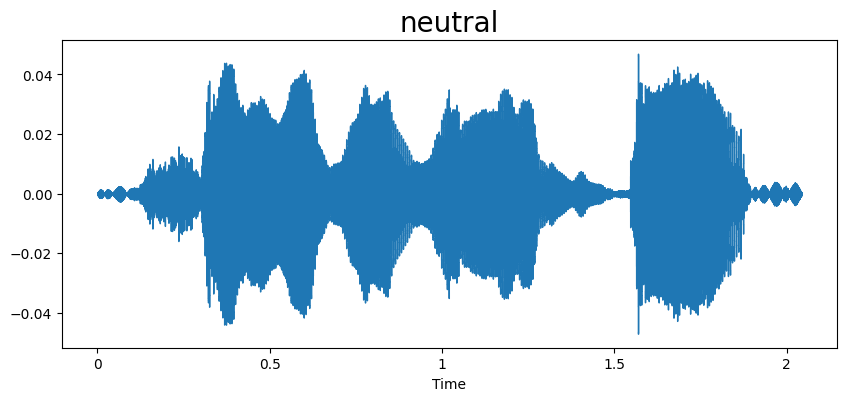

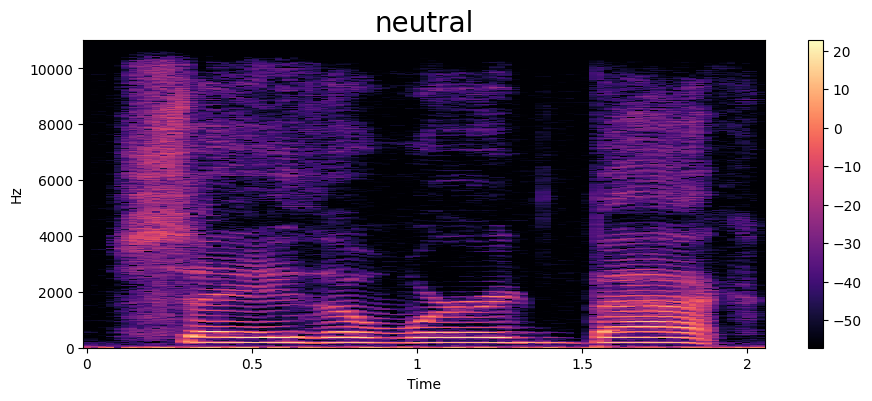

In [15]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

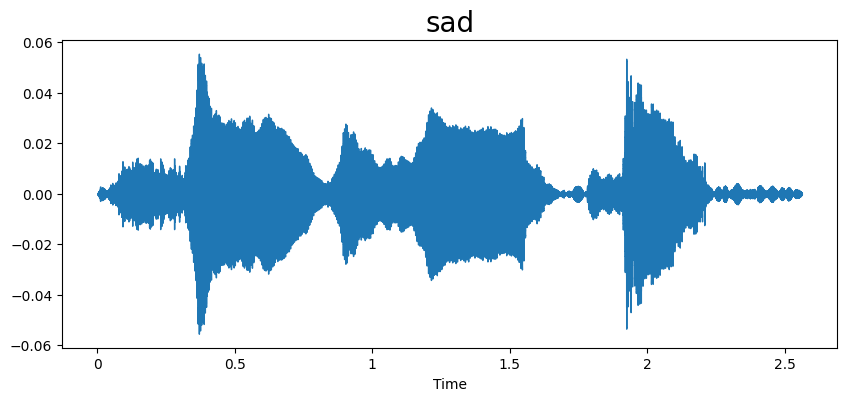

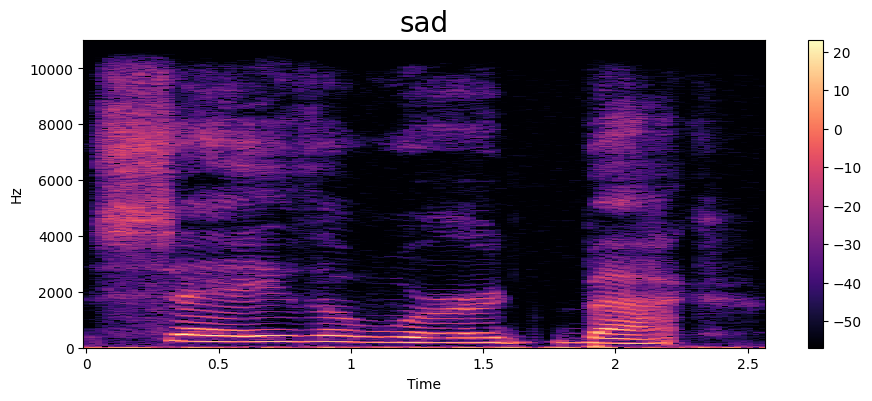

In [16]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

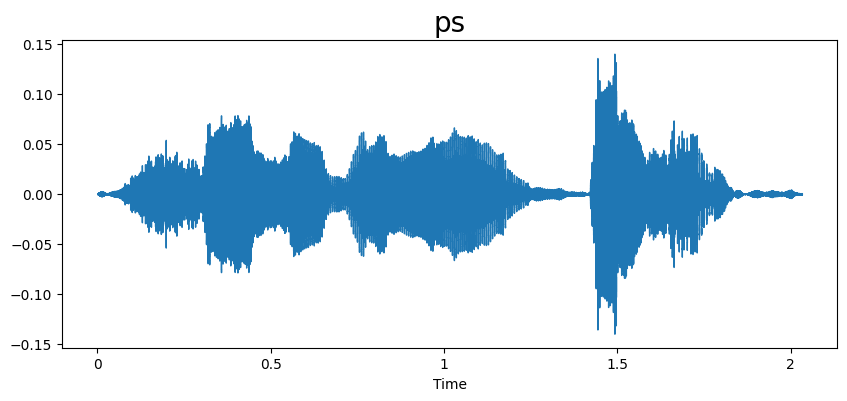

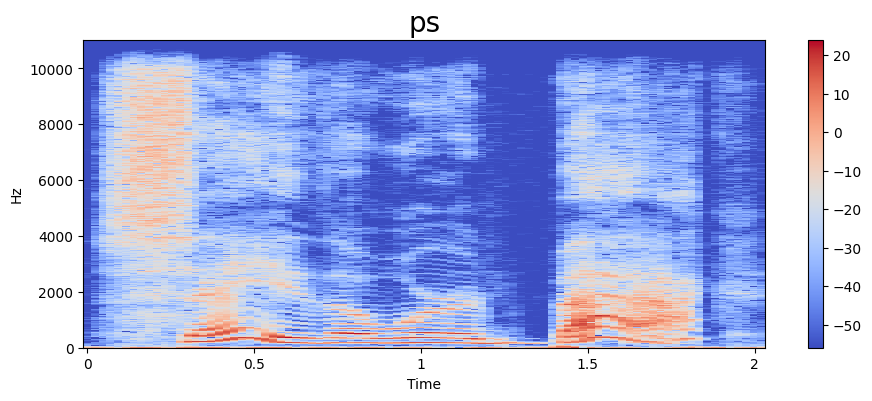

In [17]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

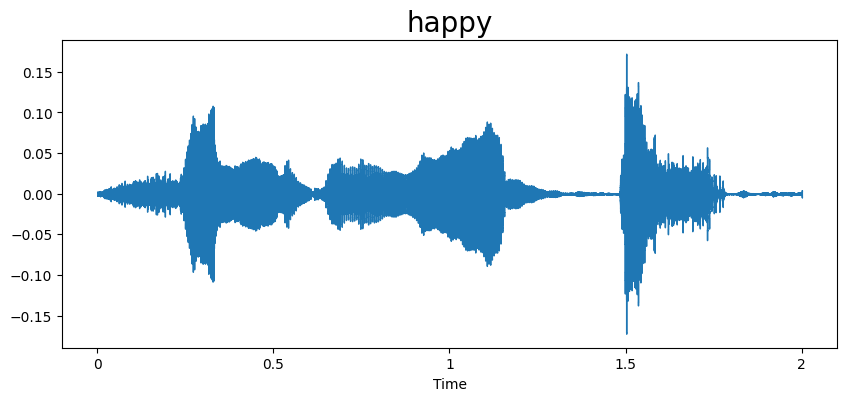

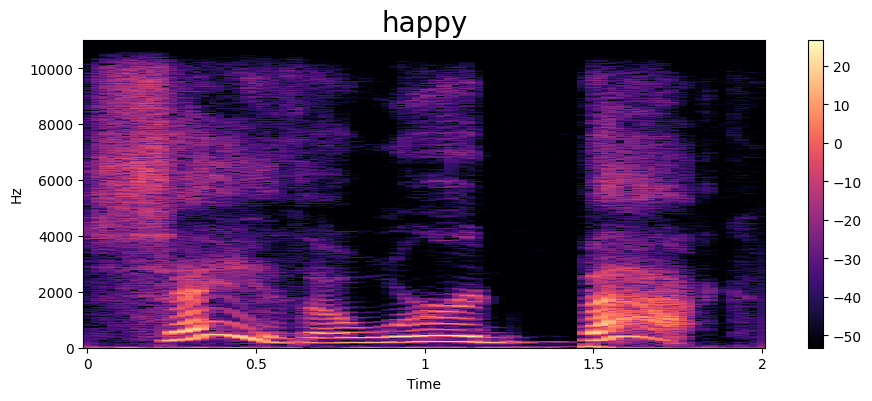

In [18]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [19]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [20]:
extract_mfcc(df['speech'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622477e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100196e-01, -2.9795790e+00,  1.3149230e+00,
       -3.4300953e-01,  2.3402820e+00,  1.9168801e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929300e+00, -9.5256548e+00,
       -8.2061357e+00, -1.2038866e+00, -7.5688171e+00,  9.9129763e+00,
        7.9321532e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294445e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034532e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [21]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.480273, -31.616299,...
2       [-431.5178, 48.56504, -0.8924488, 2.2234004, 0...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873595, 18.061928, 6.0...
                              ...                        
2795    [-408.0878, 82.66084, 30.182562, 48.84698, -3....
2796    [-428.43256, 104.70308, 22.652096, 45.17939, 2...
2797    [-380.35938, 83.53616, 32.67897, 42.358284, -7...
2798    [-436.16336, 91.74894, 26.539776, 41.395664, -...
2799    [-423.6657, 73.28961, 29.890432, 48.220123, 2....
Name: speech, Length: 2800, dtype: object

In [22]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [23]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd.fit(X)
X_transformed = svd.transform(X)


In [24]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [25]:
## input split

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(2800, 7)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [27]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 10s 120ms/step - loss: 1.2070 - accuracy: 0.5371 - val_loss: 1.8296 - val_accuracy: 0.3232
Epoch 2/50
35/35 [==============================] - 4s 109ms/step - loss: 0.5328 - accuracy: 0.8116 - val_loss: 1.6194 - val_accuracy: 0.4464
Epoch 3/50
35/35 [==============================] - 4s 105ms/step - loss: 0.2744 - accuracy: 0.9156 - val_loss: 2.4919 - val_accuracy: 0.3821
Epoch 4/50
35/35 [==============================] - 3s 97ms/step - loss: 0.2029 - accuracy: 0.9321 - val_loss: 1.8358 - val_accuracy: 0.5893
Epoch 5/50
35/35 [==============================] - 3s 97ms/step - loss: 0.1533 - accuracy: 0.9536 - val_loss: 1.3614 - val_accuracy: 0.6268
Epoch 6/50
35/35 [==============================] - 4s 107ms/step - loss: 0.1134 - accuracy: 0.9652 - val_loss: 2.1511 - val_accuracy: 0.5375
Epoch 7/50
35/35 [==============================] - 4s 103ms/step - loss: 0.1466 - accuracy: 0.9527 - val_loss: 3.4704 - val_accuracy: 0.3375
Epoch 8

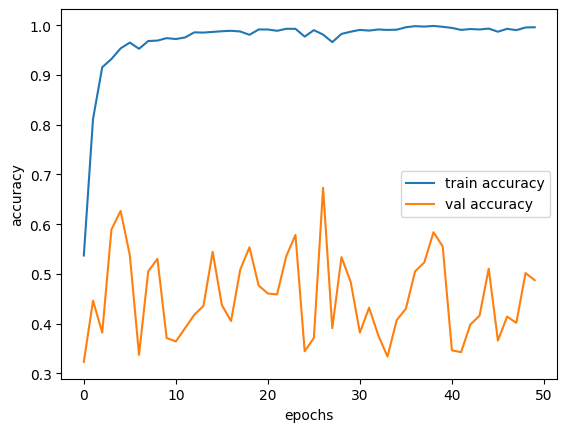

In [30]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

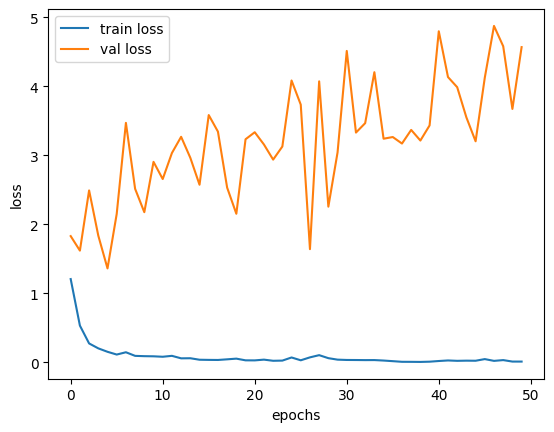

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()